Low/High
[2320, 2044]
0.5290923196276183
[[621  61]
 [546  61]]
[0.53213368 0.5       ]


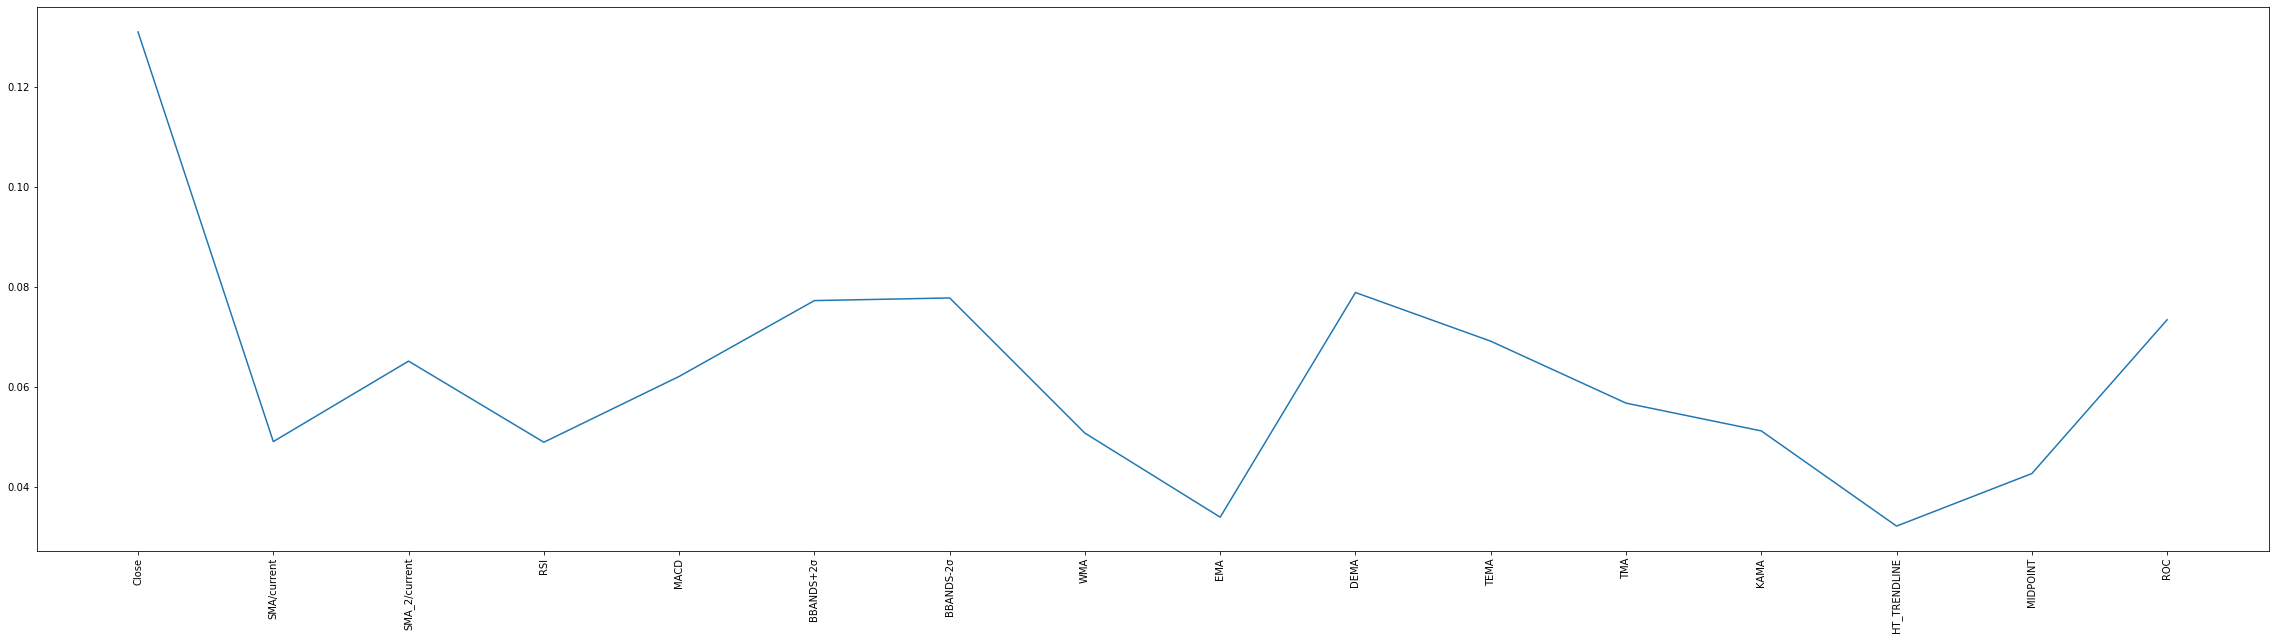

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["Close"] = df["Close"]
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["WMA"] = ta.WMA(close) / close
    df_feature["EMA"] = ta.EMA(close) / close
    df_feature["DEMA"] = ta.DEMA(close) / close
    df_feature["TEMA"] = ta.T3(close) / close
    df_feature["TMA"] = ta.TRIMA(close) / close
    df_feature["KAMA"] = ta.KAMA(close) / close
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close) / close
    df_feature["MIDPOINT"] = ta.MIDPOINT(close) / close
    df_feature["ROC"] = ta.ROCP(close) / close
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (df["Close"].pct_change(1)*100).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20001to20209_USD_JPY_D.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.7)
#print(X_train, y_train)
clf = RandomForestClassifier(min_samples_split=14, max_leaf_nodes=8, criterion='entropy')
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_01.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()



Datetime
2010-01-03 18:00   -0.000042
2010-01-03 19:00    0.000023
2010-01-03 20:00    0.000047
2010-01-03 21:00    0.000140
2010-01-03 22:00   -0.000252
                      ...   
2020-09-30 23:00    0.000144
2020-10-01 00:00    0.000214
2020-10-01 01:00    0.000049
2020-10-01 02:00   -0.000218
2020-10-01 03:00    0.000000
Length: 52619, dtype: float64
Low/High
[26458, 26161]
0.5319695528068507
[[2936 2324]
 [2595 2655]]
[0.53082625 0.53323961]


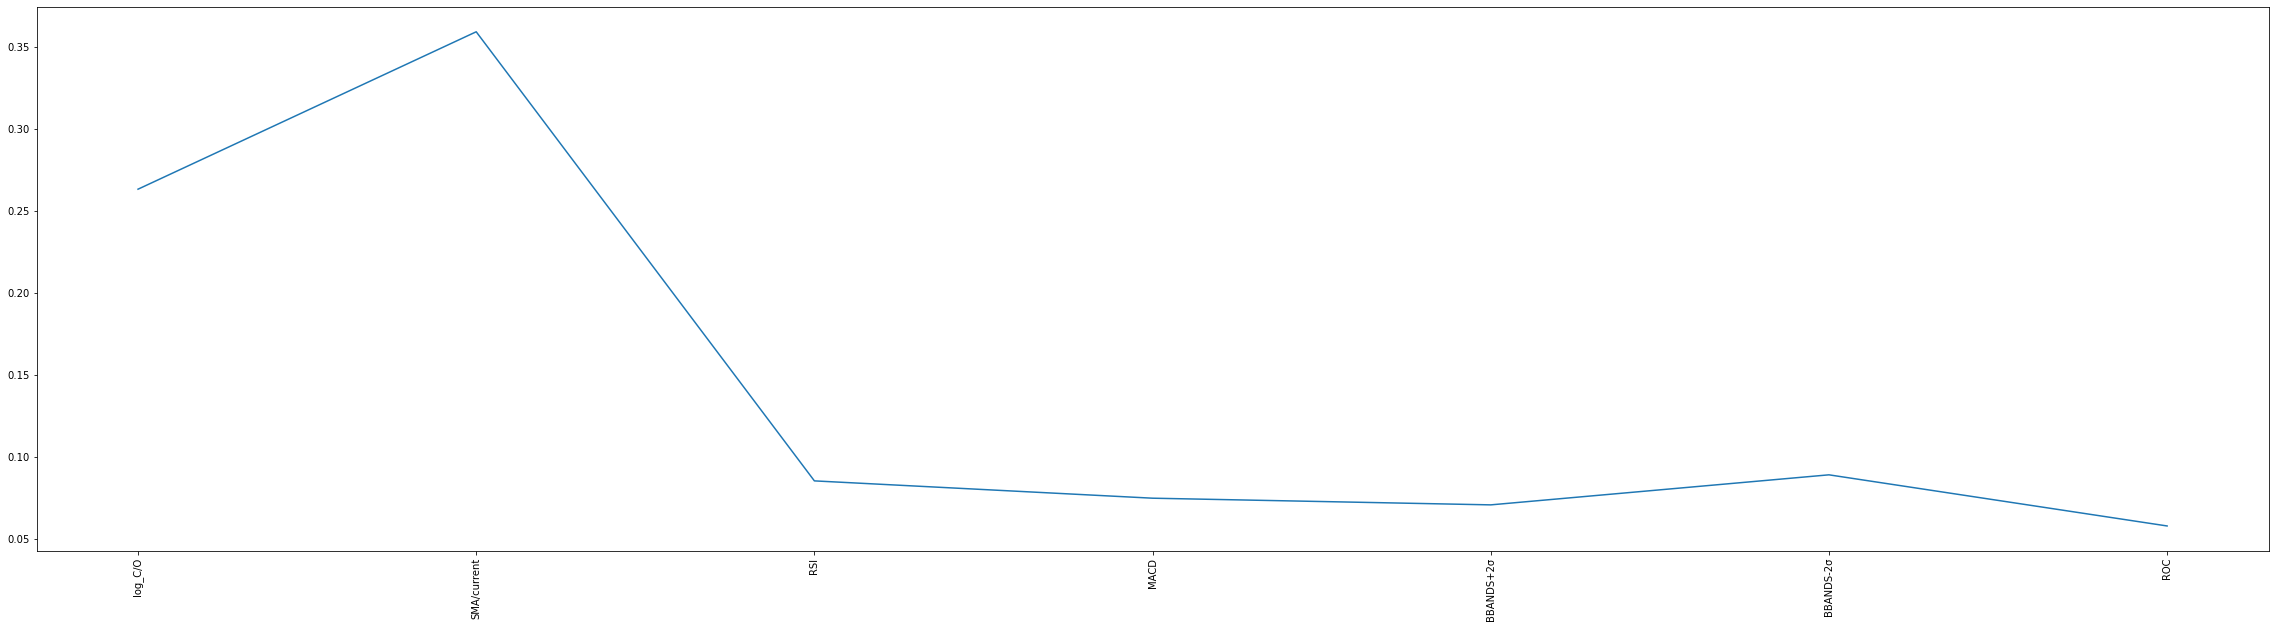

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["log_C/O"] = np.log10(df["Close"]/df["Open"])
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=5) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["ROC"] = ta.ROCP(close) / close
    
#     c=[0,0]

#     # High,Low分類
#     def classify(x):
#         if x<=1:
#             c[0]+=1
#             return 0
#         elif 1<x:
#             c[1]+=1
#             return 1
        
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1
        

#     c=[0,0,0]

#     # High,Mid,Low分類
#     def classify(x):
#         percent = 0.0005
#         if x<=-percent:
#             c[0]+=1
#             return 0
#         elif -percent<=x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (np.log10(df["Close"]/df["Open"])).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    import math
    print(np.log10(df["Close"]/df["Open"]))
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)
#print(X_train, y_train)



# def objective(trial):
#     min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
#     max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
#     clf = RandomForestClassifier(min_samples_split = min_samples_split, 
#                                 max_leaf_nodes = max_leaf_nodes,
#                                 criterion = criterion)
#     clf.fit(X_train, y_train)
#     return 1.0 - accuracy_score(y_test, clf.predict(X_test))


# study = optuna.create_study()
# study.optimize(objective, n_trials = 100)


# print(study.best_params) # 求めたハイパーパラメータ
# print(1.0 - study.best_value) # 正答率


clf = RandomForestClassifier(min_samples_split=11, max_leaf_nodes=20, criterion='entropy')
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_04.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()




Datetime
2010-01-03 18:00   -0.000042
2010-01-03 19:00    0.000023
2010-01-03 20:00    0.000047
2010-01-03 21:00    0.000140
2010-01-03 22:00   -0.000252
                      ...   
2020-09-30 23:00    0.000144
2020-10-01 00:00    0.000214
2020-10-01 01:00    0.000049
2020-10-01 02:00   -0.000218
2020-10-01 03:00    0.000000
Length: 52619, dtype: float64
Low/High
[26458, 26161]
0.5329603410215422
[[7135 6163]
 [6108 6868]]
[0.5387752  0.52705088]
0.5160995661109843
[[2557 3605]
 [2752 4223]]
[0.48163496 0.53947368]


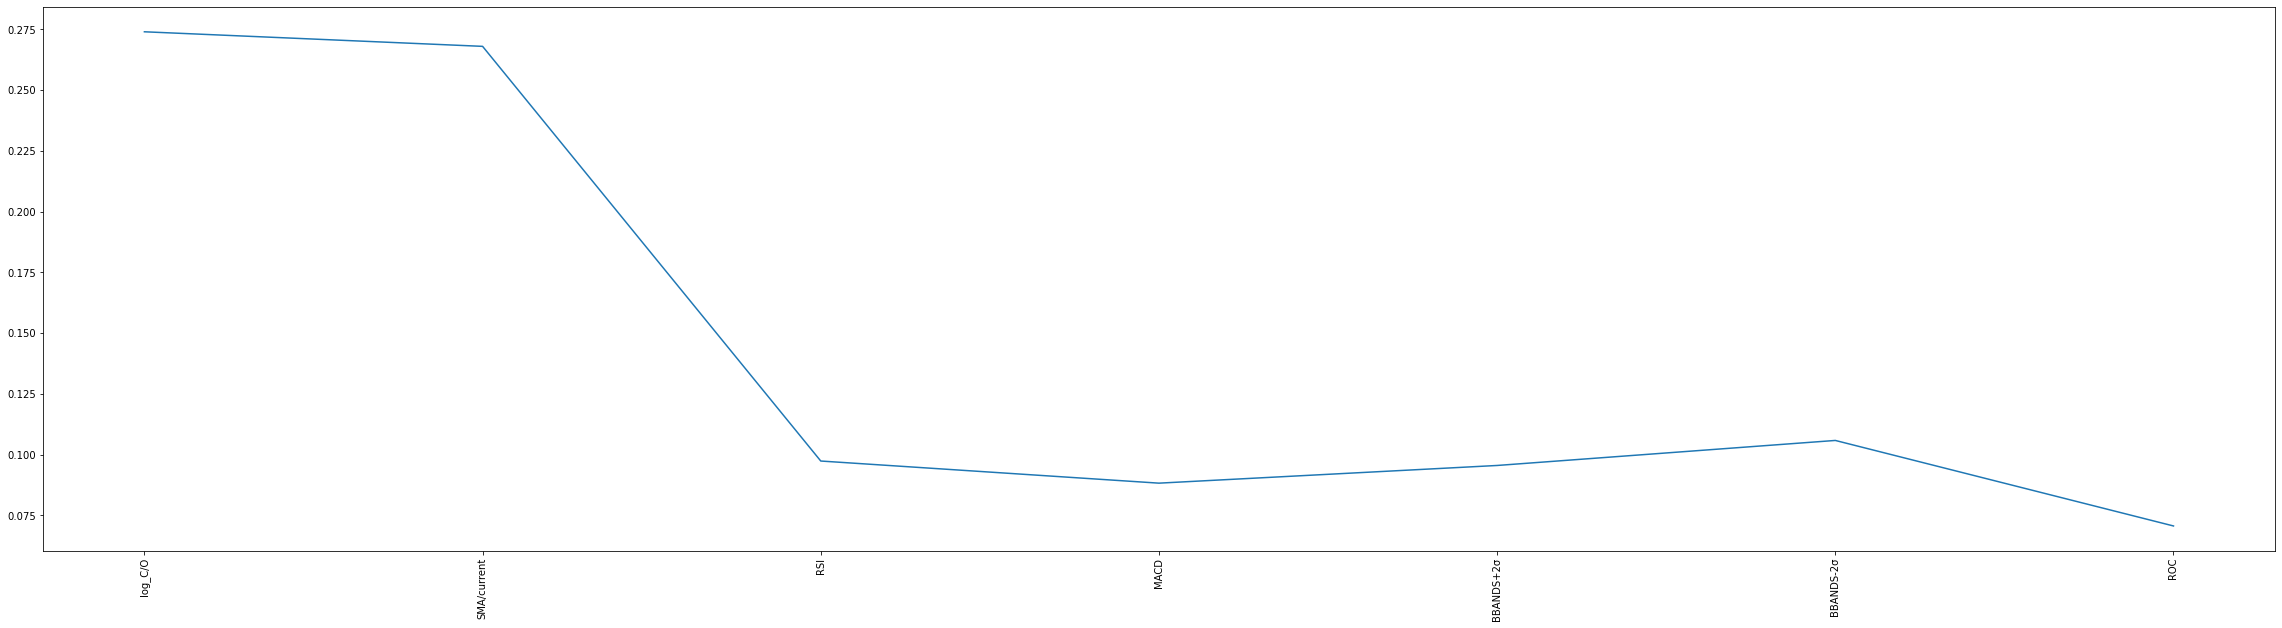

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["log_C/O"] = np.log10(df["Close"]/df["Open"])
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=5) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["ROC"] = ta.ROCP(close) / close
    
#     c=[0,0]

#     # High,Low分類
#     def classify(x):
#         if x<=1:
#             c[0]+=1
#             return 0
#         elif 1<x:
#             c[1]+=1
#             return 1
        
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1
        

#     c=[0,0,0]

#     # High,Mid,Low分類
#     def classify(x):
#         percent = 0.0005
#         if x<=-percent:
#             c[0]+=1
#             return 0
#         elif -percent<=x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (np.log10(df["Close"]/df["Open"])).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    import math
    print(np.log10(df["Close"]/df["Open"]))
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.5)
#print(X_train, y_train)



# def objective(trial):
#     min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
#     max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
#     clf = RandomForestClassifier(min_samples_split = min_samples_split, 
#                                 max_leaf_nodes = max_leaf_nodes,
#                                 criterion = criterion)
#     clf.fit(X_train, y_train)
#     return 1.0 - accuracy_score(y_test, clf.predict(X_test))


# study = optuna.create_study()
# study.optimize(objective, n_trials = 100)


# print(study.best_params) # 求めたハイパーパラメータ
# print(1.0 - study.best_value) # 正答率


clf = RandomForestClassifier(min_samples_split=11, max_leaf_nodes=20, criterion='entropy')
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))


Xy = pd.merge(X_test, y_test, left_on='Datetime', right_on='Datetime')
Xy["predict"]=result

ox = []
for p in range(0,len(result)):
    if Xy["class"][p]==Xy["predict"][p]:
        ox.extend([1])
    else:
        ox.extend([0])
Xy["o/x"]=ox

X_train, X_test, y_train, y_test = train_test_split(X_test, Xy["o/x"], train_size=0.5)


clf_cheak = RandomForestClassifier()
clf_cheak.fit(X_train, y_train)

result = clf_cheak.predict(X_test)

print(accuracy_score(y_test, result))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))


import pickle
filename = 'RF_10.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()




In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["log_C/O"] = np.log10(df["Close"]/df["Open"])
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=5) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["ROC"] = ta.ROCP(close) / close
    
#     c=[0,0]

#     # High,Low分類
#     def classify(x):
#         if x<=1:
#             c[0]+=1
#             return 0
#         elif 1<x:
#             c[1]+=1
#             return 1
        
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1
        

#     c=[0,0,0]

#     # High,Mid,Low分類
#     def classify(x):
#         percent = 0.0005
#         if x<=-percent:
#             c[0]+=1
#             return 0
#         elif -percent<=x<=percent:
#             c[1]+=1
#             return 1
#         elif percent<x:
#             c[2]+=1
#             return 2

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (np.log10(df["Close"]/df["Open"])).apply(lambda x: classify(x))

    shift = 1

    classified = classified.shift(-shift)  #分類結果をずらす
    
    
    df_y1 = df_feature.shift(1)
    df_y2 = df_feature.shift(2)
    #df_y3 = df_feature.shift(3)
    #df_y4 = df_feature.shift(4)
    print(len(df_feature))
    df_add = pd.DataFrame.join(df_y1, df_y2, lsuffix="_1")
    #pd.set_option('display.max_rows', None)
    print(len(df_add))
    
    df_feature = pd.merge(df_feature, df_add, left_on='Datetime', right_on='Datetime')
    print(len(df_feature))
    
    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted, classified)
    
    import math
    print(np.log10(df["Close"]/df["Open"])*10000)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    
    
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_D.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)
#print(X_train, y_train)



# def objective(trial):
#     min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
#     max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
#     clf = RandomForestClassifier(min_samples_split = min_samples_split, 
#                                 max_leaf_nodes = max_leaf_nodes,
#                                 criterion = criterion)
#     clf.fit(X_train, y_train)
#     return 1.0 - accuracy_score(y_test, clf.predict(X_test))


# study = optuna.create_study()
# study.optimize(objective, n_trials = 100)


# print(study.best_params) # 求めたハイパーパラメータ
# print(1.0 - study.best_value) # 正答率


clf = RandomForestClassifier(min_samples_split=11, max_leaf_nodes=20, criterion='entropy')
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_10.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()



2457
2593
2865
Datetime
2009-12-31 22:00    -1.026723
2010-01-02 22:00     2.008795
2010-01-03 22:00   -22.242384
2010-01-04 22:00   -37.816229
2010-01-05 22:00    28.980449
                      ...    
2020-09-24 21:00     7.492593
2020-09-27 21:00     0.123478
2020-09-28 21:00     6.334122
2020-09-29 21:00    -4.400460
2020-09-30 21:00    -0.576118
Length: 2457, dtype: float64
Low/High
[1282, 1175]


ValueError: Found input variables with inconsistent numbers of samples: [2794, 2386]